In [ ]:
# Import the required library to access Google Drive
from google.colab import drive

# Mount Google Drive to Colab so we can access files stored there
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset

Our dataset contains monthly air passenger numbers from 1949 to 1960.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
file_path = "/content/drive/MyDrive/AirPassengers.csv"
df= pd.read_csv(file_path)

##Data Exploration and data preprocessing

In [ ]:
df.dtypes


,0
Month,object
#Passengers,int64


In [ ]:
#rename columns Month to Date and #Passengers to Passengers

df = df.rename(columns={'Month': 'Date', '#Passengers': 'Passengers'})
df.head()


,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])




In [ ]:
df

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
#checked how many datas for each month with year

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month



In [ ]:
df

,Date,Passengers,Year,Month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5
...,...,...,...,...
139,1960-08-01,606,1960,8
140,1960-09-01,508,1960,9
141,1960-10-01,461,1960,10
142,1960-11-01,390,1960,11


Checking null values

In [ ]:
#check for null values
null_counts = df.isnull().sum()
null_counts


,0
Date,0
Passengers,0
Year,0
Month,0


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
duplicate_rows


,Date,Passengers,Year,Month


##Visualizations

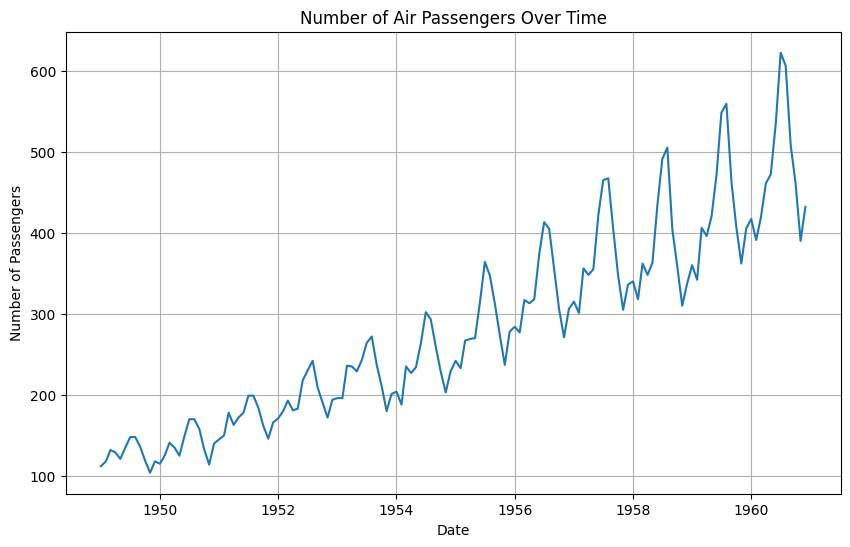

In [ ]:
#plot-passenger count over time

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Passengers'])
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Number of Air Passengers Over Time')
plt.grid(True)
plt.show()


We noticed an upward trend and seasonal variation indicating it's non-stationary.

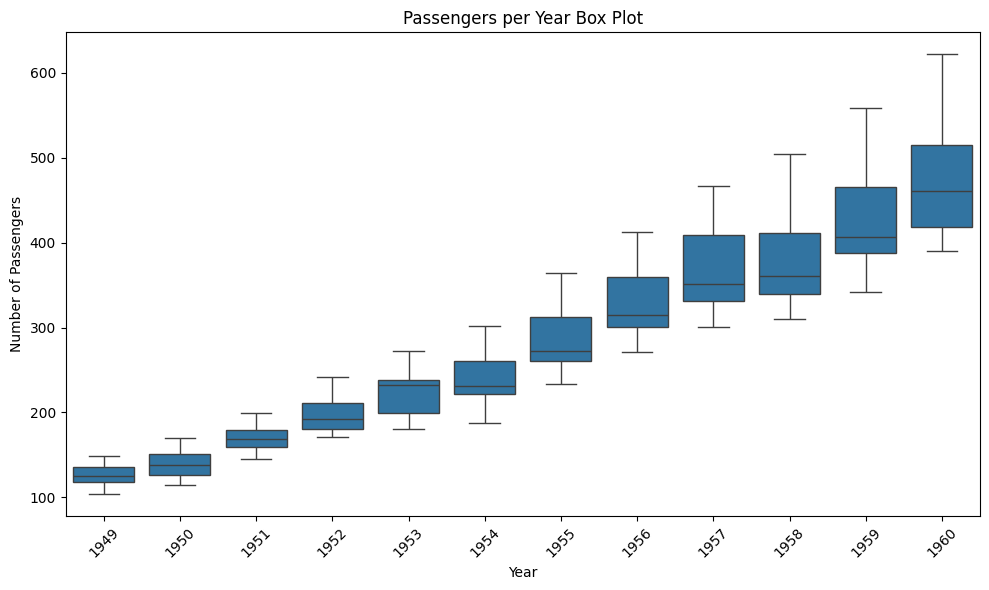

In [ ]:
#no of Passengers distribution per year box plot

import matplotlib.pyplot as plt
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Passengers', data=df)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Passengers per Year Box Plot')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


##ADF test

In [ ]:
#Perform the Augmented Dickey-Fuller (ADF) test or Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# KPSS Test
result = kpss(df['Passengers'])
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579

KPSS Statistic: 1.651312
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-61-eacce9788ebe>:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['Passengers'])


ADF Statistic (Differenced): -2.829267
p-value (Differenced): 0.054213
Critical Values (Differenced):
	1%: -3.482
	5%: -2.884
	10%: -2.579

KPSS Statistic (Differenced): 0.023898
p-value (Differenced): 0.100000
Critical Values (Differenced):
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-62-cf523e313eca>:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df['Passengers_diff'])


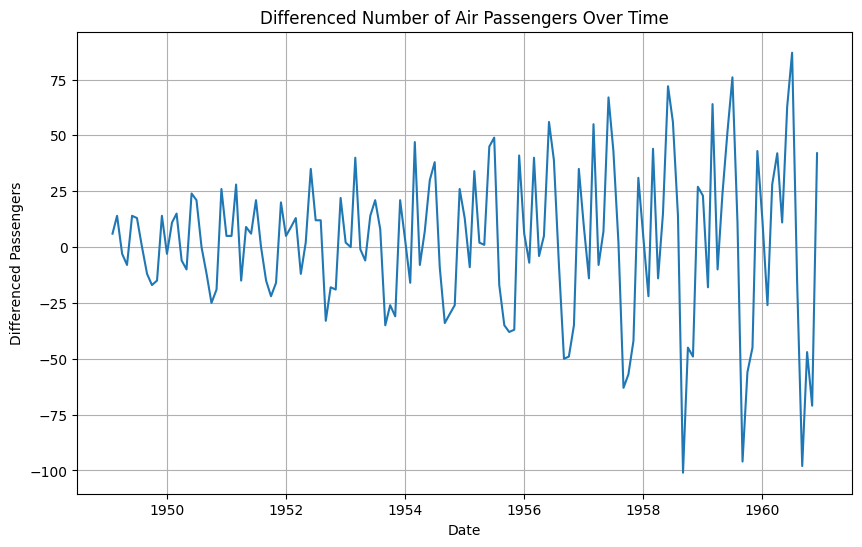

In [ ]:
#The time series is not stationary and requires transformation (differencing).

import matplotlib.pyplot as plt
# Calculate the first difference of the 'Passengers' series
df['Passengers_diff'] = df['Passengers'].diff()

# Drop the first row which will have a NaN value after differencing
df = df.dropna()

# ADF Test on the differenced series
result = adfuller(df['Passengers_diff'])
print('ADF Statistic (Differenced): %f' % result[0])
print('p-value (Differenced): %f' % result[1])
print('Critical Values (Differenced):')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# KPSS Test on the differenced series
result = kpss(df['Passengers_diff'])
print('\nKPSS Statistic (Differenced): %f' % result[0])
print('p-value (Differenced): %f' % result[1])
print('Critical Values (Differenced):')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Passengers_diff'])
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.title('Differenced Number of Air Passengers Over Time')
plt.grid(True)
plt.show()


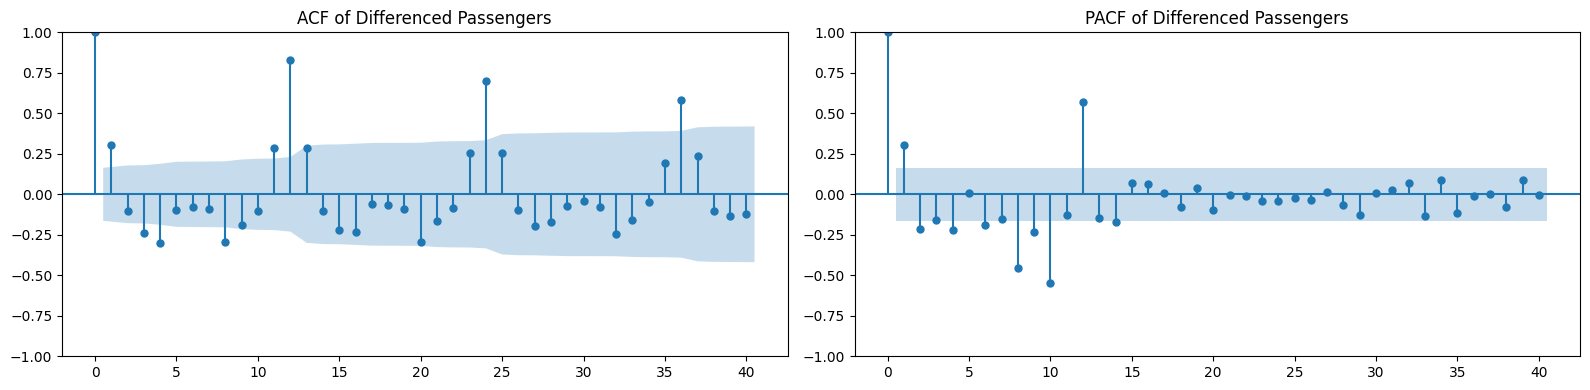

In [ ]:
#ACF and PACF Plots: Examine autocorrelation and partial autocorrelation to identify ARIMA parameters (p, d, q) and SARIMA parameters (P, D, Q, s). for differenced series

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(df['Passengers_diff'], lags=40, ax=axes[0])
axes[0].set_title('ACF of Differenced Passengers')

# PACF plot
plot_pacf(df['Passengers_diff'], lags=40, ax=axes[1])
axes[1].set_title('PACF of Differenced Passengers')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

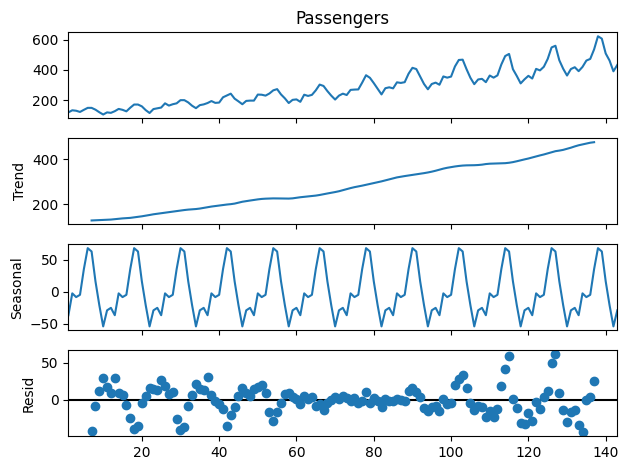

<ipython-input-64-411d1c8680eb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Passengers_deseasonalized'] = df['Passengers'] - seasonal


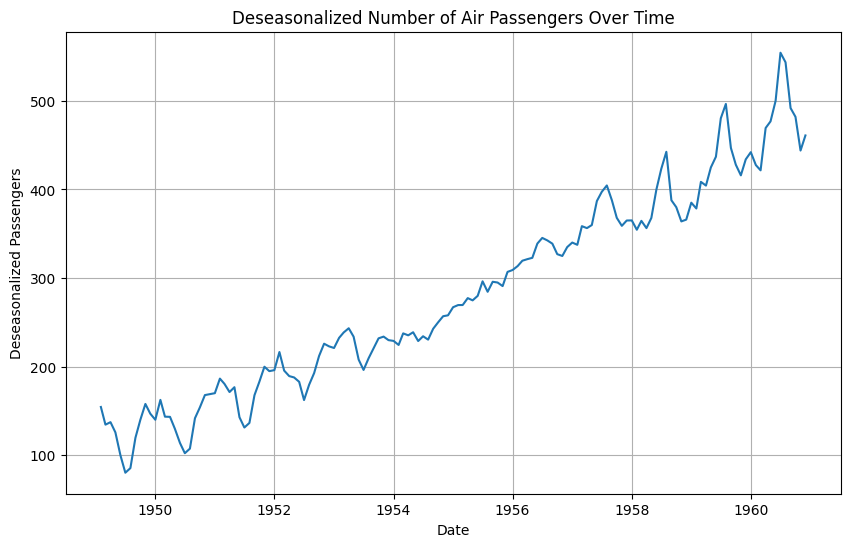

In [ ]:
#remove seasonal pattterns

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12) # period=12 for monthly data

# Access the components:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Remove the seasonal component
df['Passengers_deseasonalized'] = df['Passengers'] - seasonal

# Now you can work with the deseasonalized data, for example:
# Plot the deseasonalized data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Passengers_deseasonalized'])
plt.xlabel('Date')
plt.ylabel('Deseasonalized Passengers')
plt.title('Deseasonalized Number of Air Passengers Over Time')
plt.grid(True)
plt.show()




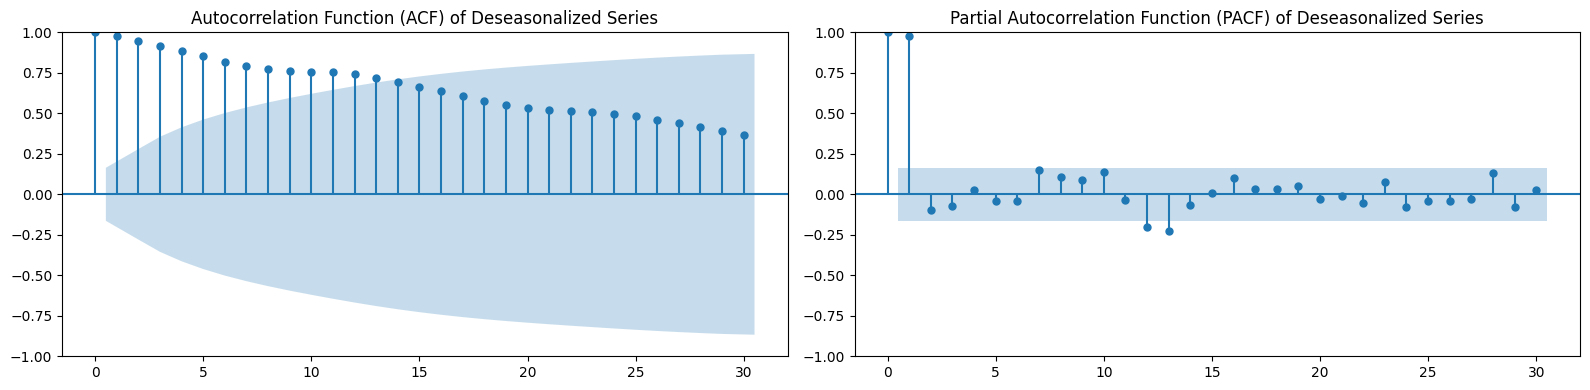

<ipython-input-65-c28064e147b0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seasonal_Diff'] = df['Passengers'].diff(12) # Assuming a period of 12 (monthly data)


In [ ]:
# ACF and PACF plots for the deseasonalized series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Passengers_deseasonalized'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of Deseasonalized Series')
plot_pacf(df['Passengers_deseasonalized'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) of Deseasonalized Series')
plt.tight_layout()
plt.show()

# Calculate the seasonal difference
df['Seasonal_Diff'] = df['Passengers'].diff(12) # Assuming a period of 12 (monthly data)
df_cleaned = df.dropna()


In [ ]:
df

,Date,Passengers,Year,Month,Passengers_diff,Passengers_deseasonalized,Seasonal_Diff
1,1949-02-01,118,1949,2,6.0,154.537058,NaN
2,1949-03-01,132,1949,3,14.0,134.590088,NaN
3,1949-04-01,129,1949,4,-3.0,137.385543,NaN
4,1949-05-01,121,1949,5,-8.0,125.855240,NaN
5,1949-06-01,135,1949,6,14.0,99.946149,NaN
...,...,...,...,...,...,...,...
139,1960-08-01,606,1960,8,-16.0,543.525694,47.0
140,1960-09-01,508,1960,9,-98.0,491.828725,45.0
141,1960-10-01,461,1960,10,-47.0,481.991604,54.0
142,1960-11-01,390,1960,11,-71.0,443.942361,28.0


#Splitting the dataset

In [ ]:
#split the dataset in order Passengers is the target and dropped those Passengers_diff	Passengers_deseasonalized split in order train and test

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['Passengers','Passengers_deseasonalized','Seasonal_Diff'], axis=1)
y = df['Passengers']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # Important: shuffle=False for time series data

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (114, 4)
y_train shape: (114,)
X_test shape: (29, 4)
y_test shape: (29,)


In [ ]:
X_train

,Date,Year,Month,Passengers_diff
1,1949-02-01,1949,2,6.0
2,1949-03-01,1949,3,14.0
3,1949-04-01,1949,4,-3.0
4,1949-05-01,1949,5,-8.0
5,1949-06-01,1949,6,14.0
...,...,...,...,...
110,1958-03-01,1958,3,44.0
111,1958-04-01,1958,4,-14.0
112,1958-05-01,1958,5,15.0
113,1958-06-01,1958,6,72.0


#Model Training and evaluation

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


RMSE: 30.207710662097053
MAE: 23.62492422541592


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


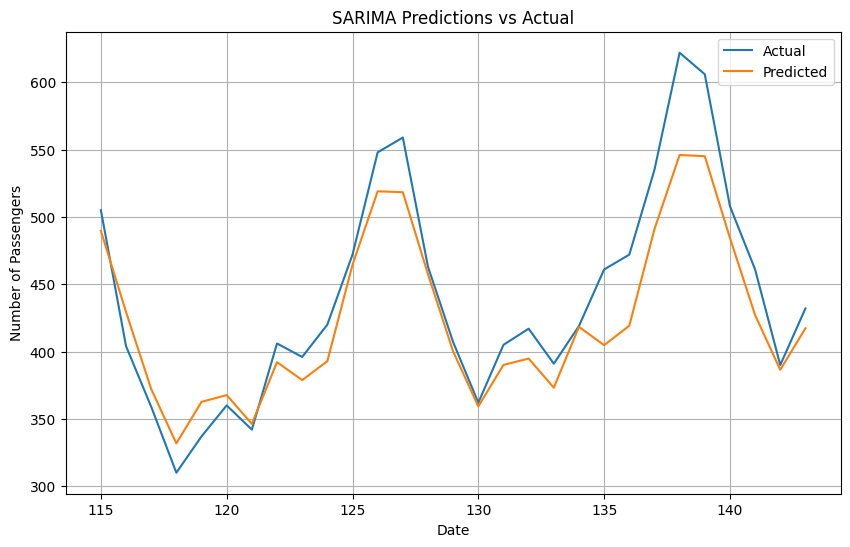

In [ ]:
#SARIMA model and evaluaton for passenger prediction

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters

# Train the SARIMA model on the training data
model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Make predictions on the test data
predictions = results.get_forecast(steps=len(y_test))
apredicted_mean = predictions.predicted_mean

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, apredicted_mean))
mae = mean_absolute_error(y_test, apredicted_mean)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, apredicted_mean, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('SARIMA Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

ARIMA(1,1,1) - RMSE: 97.4363145657033
ARIMA(1,1,1) - MAE: 85.19963338543974


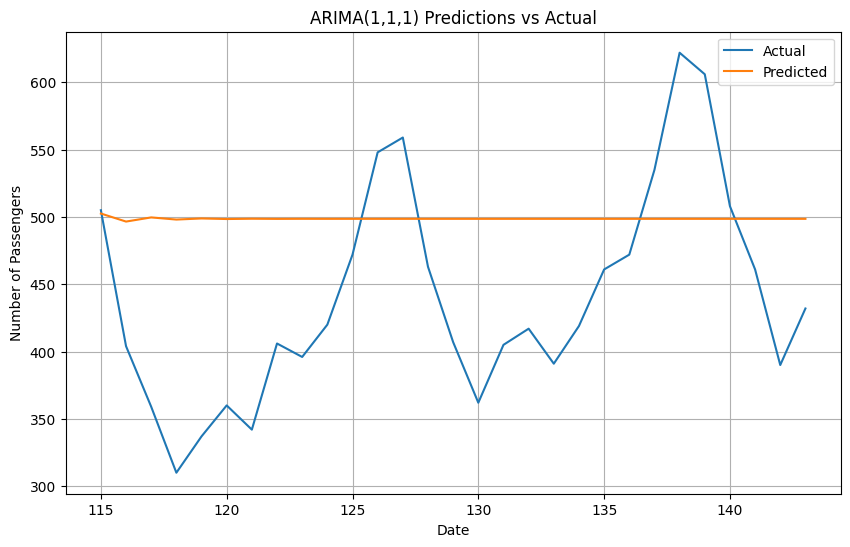

In [ ]:
#ARIMA (1, 1, 1)

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 1, 1, 1  # Non-seasonal parameters

# Train the ARIMA model on the training data
model = SARIMAX(y_train, order=(p, d, q))  # No seasonal_order for ARIMA
results = model.fit()

# Make predictions on the test data
predictions = results.get_forecast(steps=len(y_test))
predicted_mean = predictions.predicted_mean

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predicted_mean))
mae = mean_absolute_error(y_test, predicted_mean)

print(f"ARIMA(1,1,1) - RMSE: {rmse}")
print(f"ARIMA(1,1,1) - MAE: {mae}")


# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predicted_mean, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('ARIMA(1,1,1) Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#compare test and predictions values

import pandas as pd
# Assuming 'y_test' and 'predicted_mean' are already defined as in your provided code.

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': apredicted_mean})

# Display the comparison DataFrame
comparison_df

# You can also calculate other metrics like MAE, MAPE, etc. as shown in your original code.


,Actual,Predicted
114,NaN,489.719353
115,505.0,429.394457
116,404.0,372.174393
117,359.0,331.799667
118,310.0,362.642255
119,337.0,367.664468
120,360.0,346.303011
121,342.0,392.153830
122,406.0,378.782365
123,396.0,392.840793
